In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Student data filepath
student_data_path = "data/StudentPerformanceFactors.csv"

# Student data dataframe created by reading the CSV with pandas
student_df = pd.read_csv(student_data_path)

In [11]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [12]:
# Convert 'Motivation_Level' to numerical values
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
student_df['Motivation_Level_Numeric'] = student_df['Motivation_Level'].map(motivation_mapping)
# Average Motivation Level based on Parental Involvement
motivation_analysis = student_df.groupby('Parental_Involvement')['Motivation_Level_Numeric'].mean().reset_index()
order = ['Low', 'Medium', 'High']
print(motivation_analysis)

  Parental_Involvement  Motivation_Level_Numeric
0                 High                  1.887317
1                  Low                  1.932685
2               Medium                  1.906901


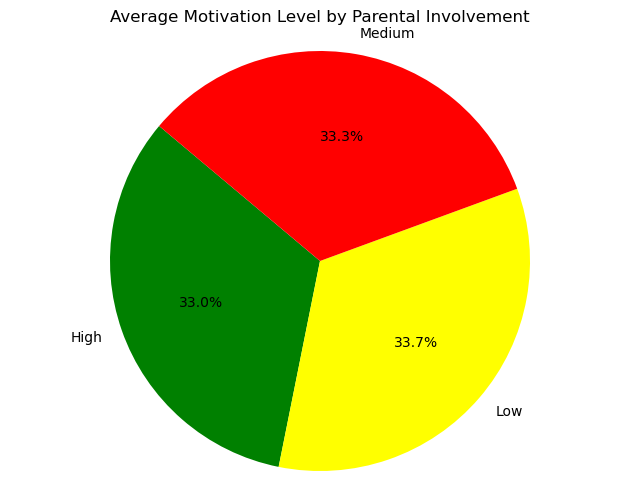

In [35]:
# Prepare data for pie chart
labels = motivation_analysis['Parental_Involvement']
sizes = motivation_analysis['Motivation_Level_Numeric']
colors = ['green', 'yellow', 'red']  # You can choose your colors

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Motivation Level by Parental Involvement')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [23]:
# Contingency table
contingency_table = pd.crosstab(student_df['Parental_Involvement'], student_df['Motivation_Level'])

# Define the custom order for rows and columns
row_order = ['Low', 'Medium', 'High']
column_order = ['Low', 'Medium', 'High']

# Sort the contingency table by the custom order for rows and columns
contingency_table = contingency_table.reindex(index=row_order, fill_value=0)
contingency_table = contingency_table.reindex(columns=column_order, fill_value=0)

# Print the sorted contingency table
print(contingency_table)

Motivation_Level      Low  Medium  High
Parental_Involvement                   
Low                   368     691   278
Medium                995    1685   682
High                  574     975   359


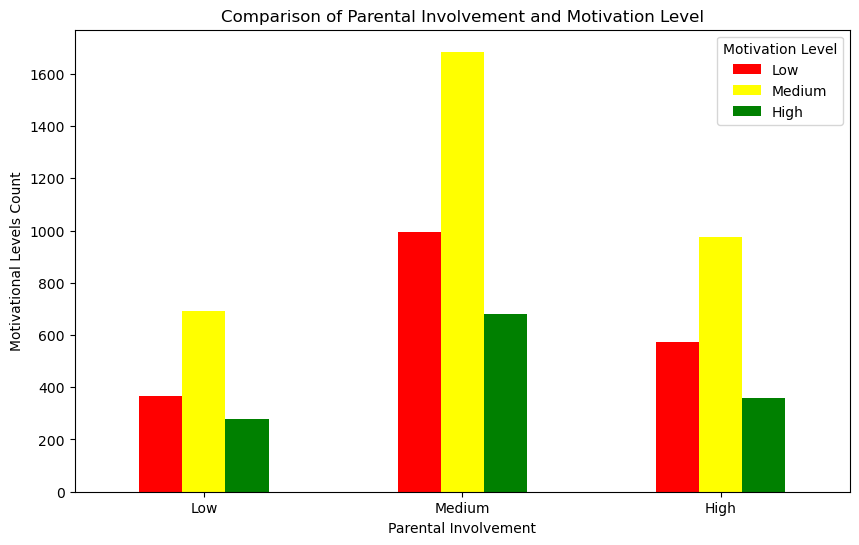

In [25]:
# Define colors for each category
color_map = {
    'Low': 'red',
    'Medium': 'yellow',
    'High': 'green'
}

# Create a bar plot
contingency_table.plot(kind='bar', color=[color_map[col] for col in contingency_table.columns], figsize=(10, 6))

# Set the title and labels
plt.title('Comparison of Parental Involvement and Motivation Level')
plt.xlabel('Parental Involvement')
plt.ylabel('Motivational Levels Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Show the plot
plt.legend(title='Motivation Level')
plt.show()